In [1]:
from sys import path
from os.path import relpath, realpath, abspath, join, exists
from itertools import product

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import h5py

pd.set_option('display.max_rows', 999)

In [2]:
from torchnetjson.builder import build_net

In [3]:
from thesis_v2 import dir_dict
from thesis_v2.data import load_data_helper
from thesis_v2.training.training_aux import load_training_results
from thesis_v2.training_extra.misc import count_params
from thesis_v2.models.maskcnn_polished_with_local_pcn.builder import load_modules

load_modules()

In [4]:
folder_to_check = 'scripts/training/yuanyuan_8k_a_3day/maskcnn_polished_with_local_pcn'
path.insert(0, join(dir_dict['root'], folder_to_check))
from submit_certain_configs import param_iterator_obj
from key_utils import keygen

In [5]:
def load_everything():
    _df_collect = []
    for idx, param in enumerate(param_iterator_obj.generate()):
        if idx % 50 == 0:
            print(idx)
            
#         print(len(param))
        
        assert len(param) == 23
        assert param['split_seed'] == 'legacy'
        assert param['out_channel'] == 16
        assert param['num_layer'] == 2
        assert param['kernel_size_l1'] == 9
        assert param['pooling_ksize'] == 3
        assert param['pooling_type'] == 'avg'
        
#         assert param['model_seed'] == 0
        
        key = keygen(**{k: v for k, v in param.items() if k not in {'scale', 'smoothness'}})
        # 10 to go.
        result = load_training_results(key, return_model=False)
        # load twice, first time to get the model.
        result = load_training_results(key, return_model=True, model=build_net(result['config_extra']['model']))
        num_epochs = [len(x) for x in result['stats_all']]
        _df_collect.append(
            {
#                 'split_seed': str(param['split_seed']),
                
                
                'act_fn': param['act_fn'],
                'bn_before_act': param['bn_before_act'],
                'bn_after_fc': param['bn_after_fc'],
                'input_size': param['input_size'],
                'loss_type': param['loss_type'],
                
                # 12 to go
                
                'scale': float(param['scale']),
                # 
                'smoothness': float(param['smoothness']),
                # 
                
                # 8 to go
                'pcn_bn': param['pcn_bn'],
                'pcn_bn_post': param['pcn_bn_post'],
                'pcn_bypass': param['pcn_bypass'],
                'pcn_final_act': param['pcn_final_act'],
                'pcn_no_act': param['pcn_no_act'],
                'pcn_bias': param['pcn_bias'],
                
                'pcn_cls': param['pcn_cls'],
                
                'model_seed': param['model_seed'],
                
                'corr_test': result['stats_best']['stats']['test']['corr_mean'],
                'max_epoch': max(num_epochs),
                'num_param': count_params(result['model']),
            }
        )
        _df =  pd.DataFrame(_df_collect, columns=[
#             'split_seed',
            'act_fn', 'bn_before_act', 'bn_after_fc',
            'input_size', 'loss_type', 'scale',
            'smoothness',
            
            'pcn_bn', 'pcn_bn_post', 'pcn_bypass', 'pcn_final_act', 'pcn_no_act', 'pcn_bias', 'pcn_cls',
            'model_seed',
            
            'corr_test', 'num_param',
            'max_epoch',
            
                                                 ])
        _df = _df.set_index([
            'act_fn', 'bn_before_act', 'bn_after_fc',
            'input_size', 'loss_type', 'scale',
            'smoothness',
            'pcn_bn', 'pcn_bn_post', 'pcn_bypass', 'pcn_final_act', 'pcn_no_act', 'pcn_bias', 'pcn_cls',
            'model_seed',
        ],verify_integrity=True)
    return _df

In [6]:
df = load_everything()

0
50
100
150
200
250
300
350
400
450
500
550
600
650
700
750
800
850
900
950
1000
1050
1100
1150
1200
1250
1300
1350
1400
1450
1500
1550
1600
1650
1700
1750
1800
1850
1900
1950
2000
2050
2100
2150
2200
2250
2300


In [7]:
corr_mean = df['corr_test'].unstack('model_seed').mean(axis=1)
corr_std = df['corr_test'].unstack('model_seed').std(axis=1)

In [8]:
corr_mean.unstack('pcn_cls')

pcn_cls                                                                                                                                          0  \
act_fn   bn_before_act bn_after_fc input_size loss_type scale smoothness pcn_bn pcn_bn_post pcn_bypass pcn_final_act pcn_no_act pcn_bias             
relu     False         False       50         mse       0.01  0.000005   False  False       False      False         False      True      0.501580   
                                                                                                       True          False      True      0.500760   
                                                                                True        False      False         False      True      0.513242   
                                                                                                       True          False      True      0.513242   
                                                                         True   False       False      False         False      True      0.514151   
                                                                                                       True          False      True      0.514184   
                                                                                True        False      False         False      True      0.517847   
                                                                                                       True          False      True      0.513589   
                                              poisson   0.01  0.000005   False  False       False      False         False      True      0.479028   
                                                                                                       True          False      True      0.468681   
                                                                                True        False      False         False      True      0.510613   
                                                                                                       True          False      True      0.510869   
                                                                         True   False       False      False         False      True      0.511138   
                                                                                                       True          False      True      0.508002   
                                                                                True        False      False         False      True      0.511718   
                                                                                                       True          False      True      0.510532   
                                   100        mse       0.01  0.000005   False  False       False      False         False      True      0.407307   
                                                                                                       True          False      True      0.407773   
                                                                                True        False      False         False      True      0.527491   
                                                                                                       True          False      True      0.527491   
                                                                         True   False       False      False         False      True      0.528130   
                                                                                                       True          False      True      0.533869   
                                                                                True        False      False         False      True      0.529409   
                                                                                                       True          False      True      0.530143   
                                              poisson   0.01  0.000005   False  False       False   

In [9]:
corr_std.unstack('pcn_cls')

pcn_cls                                                                                                                                          0  \
act_fn   bn_before_act bn_after_fc input_size loss_type scale smoothness pcn_bn pcn_bn_post pcn_bypass pcn_final_act pcn_no_act pcn_bias             
relu     False         False       50         mse       0.01  0.000005   False  False       False      False         False      True      0.001836   
                                                                                                       True          False      True      0.003563   
                                                                                True        False      False         False      True      0.003057   
                                                                                                       True          False      True      0.003057   
                                                                         True   False       False      False         False      True      0.004010   
                                                                                                       True          False      True      0.006681   
                                                                                True        False      False         False      True      0.003724   
                                                                                                       True          False      True      0.003769   
                                              poisson   0.01  0.000005   False  False       False      False         False      True      0.013642   
                                                                                                       True          False      True      0.022353   
                                                                                True        False      False         False      True      0.004629   
                                                                                                       True          False      True      0.005070   
                                                                         True   False       False      False         False      True      0.004807   
                                                                                                       True          False      True      0.006897   
                                                                                True        False      False         False      True      0.004050   
                                                                                                       True          False      True      0.001045   
                                   100        mse       0.01  0.000005   False  False       False      False         False      True      0.008444   
                                                                                                       True          False      True      0.009021   
                                                                                True        False      False         False      True      0.002333   
                                                                                                       True          False      True      0.002333   
                                                                         True   False       False      False         False      True      0.002661   
                                                                                                       True          False      True      0.006057   
                                                                                True        False      False         False      True      0.003844   
                                                                                                       True          False      True      0.001199   
                                              poisson   0.01  0.000005   False  False       False   

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt

def scatter(x, y, xlabel, ylabel, title):
    
    # only check high performing cases.
    selector = np.logical_and(x>=0.5, y>=0.5)
    x=x[selector]
    y=y[selector]
    
    plt.close('all')
    plt.figure(figsize=(6, 5))
    plt.scatter(x, y, s=1)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.axis('equal')
    plt.xlim(0.5,0.55)
    plt.ylim(0.5,0.55)
    plt.plot([0,1],[0,1],linestyle='--')
    plt.title(title)
    plt.show()
    print('y-x mean', (y-x).mean(), 'y-x>0 mean', ((y-x)>0).mean())
    print('y top', y.max(), 'x top', x.max())

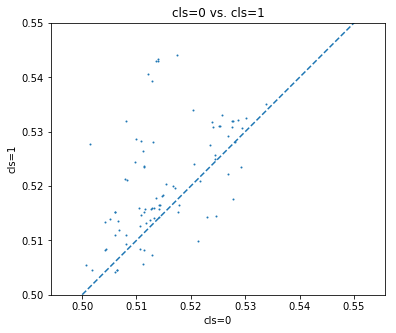

y-x mean 0.005663880197576777 y-x>0 mean 0.813953488372093
y top 0.5441107153892517 x top 0.5338693261146545


In [11]:
scatter(corr_mean.unstack('pcn_cls').values[:,0], corr_mean.unstack('pcn_cls').values[:,1], 'cls=0', 'cls=1', 'cls=0 vs. cls=1')

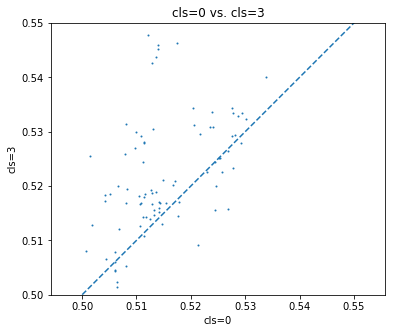

y-x mean 0.006816704605900966 y-x>0 mean 0.7558139534883721
y top 0.5477384527524313 x top 0.5338693261146545


In [12]:
scatter(corr_mean.unstack('pcn_cls').values[:,0], corr_mean.unstack('pcn_cls').values[:,3], 'cls=0', 'cls=3', 'cls=0 vs. cls=3')

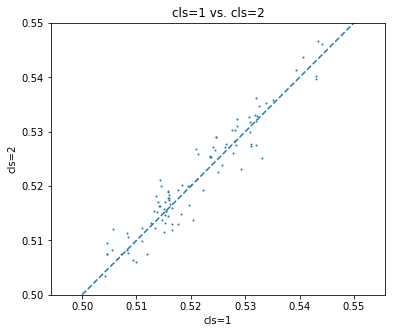

y-x mean 0.0005488946206039907 y-x>0 mean 0.6458333333333334
y top 0.5467609365781149 x top 0.5441107153892517


In [13]:
scatter(corr_mean.unstack('pcn_cls').values[:,1], corr_mean.unstack('pcn_cls').values[:,2], 'cls=1', 'cls=2', 'cls=1 vs. cls=2')

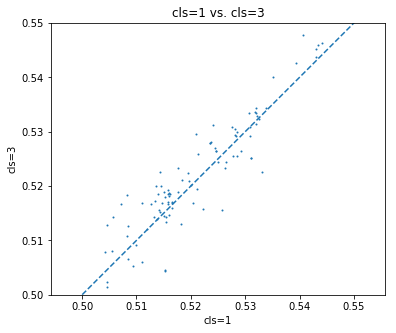

y-x mean 0.0010825400758120742 y-x>0 mean 0.6770833333333334
y top 0.5477384527524313 x top 0.5441107153892517


In [14]:
scatter(corr_mean.unstack('pcn_cls').values[:,1], corr_mean.unstack('pcn_cls').values[:,3], 'cls=1', 'cls=3', 'cls=1 vs. cls=3')

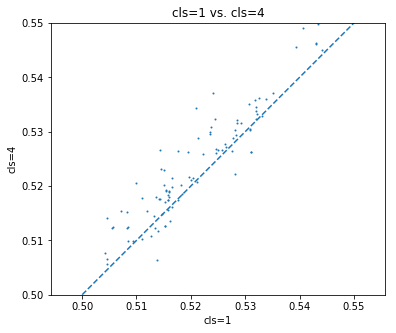

y-x mean 0.0028435791739159152 y-x>0 mean 0.8020833333333334
y top 0.5497733354568481 x top 0.5441107153892517


In [15]:
scatter(corr_mean.unstack('pcn_cls').values[:,1], corr_mean.unstack('pcn_cls').values[:,4], 'cls=1', 'cls=4', 'cls=1 vs. cls=4')

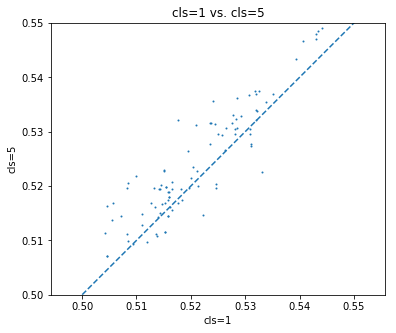

y-x mean 0.0030875208063258094 y-x>0 mean 0.7916666666666666
y top 0.5490602850914001 x top 0.5441107153892517


In [16]:
scatter(corr_mean.unstack('pcn_cls').values[:,1], corr_mean.unstack('pcn_cls').values[:,5], 'cls=1', 'cls=5', 'cls=1 vs. cls=5')

In [17]:
from thesis_v2.plots.util import savefig

(128, 6)
0.6875
[0, 1, 2, 3, 4, 5]
n 88
1 - 0 mean 0.005227403545921502 sem 0.0010023019673721966
2 - 1 mean 0.0003784670296943616 sem 0.0003271380851365495
3 - 2 mean 0.0006602154762455847 sem 0.0003584377150274921
5 - 3 mean 0.0020472192854592303 sem 0.0004374938380665145
5 - 2 mean 0.002707434761704815 sem 0.0004878078665440827


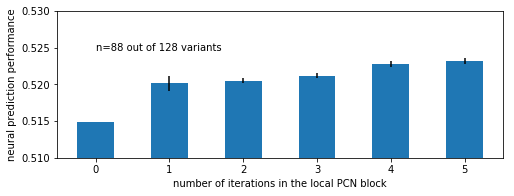

In [18]:
def plot_step_increase(pairs_to_check):
    # remove those no innner act ones.
    df_unstacked = corr_mean.unstack('pcn_cls')
#     df_unstacked = corr_mean.unstack('pcn_cls')
    print(df_unstacked.shape)
    
    selector = df_unstacked.values[:,0] >= 0.50
#     selector = ()
    print(selector.mean())
    
    cls_values = df_unstacked.columns.values.tolist()
    print(cls_values)
    assert cls_values == list(range(len(cls_values)))
    
    n = selector.sum()
    print('n', n)
    
    
    for p1, p2 in pairs_to_check:
        val0 = df_unstacked.values[:,p1][selector]
        val1 = df_unstacked.values[:,p2][selector]

        # selection
        
        print(
            f'{p2} - {p1}',
            'mean', (val1-val0).mean(),
            'sem', (val1-val0).std()/np.sqrt(n)
        )
        
    # time to plot.
    # show results for cls_values[0] through cls_values[-1]
    # for the first one, just show mean,
    # for others show mean and s.e.m. of increase.
    
    mean_performance = []
    sem_increase = []
    labels = []
    
    for idx, cls_name in enumerate(cls_values):
        assert idx == cls_name
        mean_performance.append(df_unstacked.values[:,idx][selector].mean())
        if idx == 0:
            sem_increase.append(0.0)
        else:
            sem_increase.append((df_unstacked.values[:,idx][selector]-df_unstacked.values[:,idx-1][selector]).std()/np.sqrt(n))
        labels.append(str(cls_name))
        
    
    plt.close('all')
    fig = plt.figure(figsize=(8,3))
    plt.bar(np.arange(len(cls_values)), mean_performance, 0.5, yerr=sem_increase)
    plt.ylabel('neural prediction performance')
    plt.ylim(0.51, 0.53)
    plt.xlabel('number of iterations in the local PCN block')
    plt.xticks(np.arange(len(cls_values)), labels)
    
    
    plt.text(0, 0.525, f'n={n} out of {selector.size} variants', verticalalignment='center', horizontalalignment='left')
    fig.subplots_adjust(bottom=0.2)
    savefig(fig, 'yuanyuan_8k_a_3day/maskcnn_polished_with_local_pcn/basic_for_certain_configs/main.pdf')
    
    plt.show()
    
    
    
# trend for 0-1-2 is good. then bad.
plot_step_increase([(0,1),(1,2),(2,3),(3,5),(2,5)])

In [19]:
corr_mean.unstack('pcn_cls')

pcn_cls                                                                                                                                          0  \
act_fn   bn_before_act bn_after_fc input_size loss_type scale smoothness pcn_bn pcn_bn_post pcn_bypass pcn_final_act pcn_no_act pcn_bias             
relu     False         False       50         mse       0.01  0.000005   False  False       False      False         False      True      0.501580   
                                                                                                       True          False      True      0.500760   
                                                                                True        False      False         False      True      0.513242   
                                                                                                       True          False      True      0.513242   
                                                                         True   False       False      False         False      True      0.514151   
                                                                                                       True          False      True      0.514184   
                                                                                True        False      False         False      True      0.517847   
                                                                                                       True          False      True      0.513589   
                                              poisson   0.01  0.000005   False  False       False      False         False      True      0.479028   
                                                                                                       True          False      True      0.468681   
                                                                                True        False      False         False      True      0.510613   
                                                                                                       True          False      True      0.510869   
                                                                         True   False       False      False         False      True      0.511138   
                                                                                                       True          False      True      0.508002   
                                                                                True        False      False         False      True      0.511718   
                                                                                                       True          False      True      0.510532   
                                   100        mse       0.01  0.000005   False  False       False      False         False      True      0.407307   
                                                                                                       True          False      True      0.407773   
                                                                                True        False      False         False      True      0.527491   
                                                                                                       True          False      True      0.527491   
                                                                         True   False       False      False         False      True      0.528130   
                                                                                                       True          False      True      0.533869   
                                                                                True        False      False         False      True      0.529409   
                                                                                                       True          False      True      0.530143   
                                              poisson   0.01  0.000005   False  False       False   